In [31]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [33]:
train = pd.read_csv('6.all_train_채널정보.csv')

In [34]:
train.head()

,Unnamed: 0,기준년월,ID,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,인입일수_ARS_R6M,인입월수_ARS_R6M,인입후경과월_ARS,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,...,당사PAY_방문횟수_R6M,당사PAY_방문월수_R6M,당사멤버쉽_방문횟수_B0M,당사멤버쉽_방문횟수_R6M,당사멤버쉽_방문월수_R6M,OS구분코드,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M
0,0,201807,TRAIN_000000,10회 이상,10회 이상,8,6,0,2,6,...,0,0,22,221,6,Android,0,0,0,0
1,1,201807,TRAIN_000001,1회 이상,1회 이상,0,0,0,0,0,...,0,0,0,0,0,NaN,0,0,0,0
2,2,201807,TRAIN_000002,1회 이상,1회 이상,1,1,0,2,5,...,0,0,0,0,0,Android,11,6,5,5
3,3,201807,TRAIN_000003,10회 이상,10회 이상,10,6,0,2,6,...,0,0,23,219,6,Android,0,0,0,0
4,4,201807,TRAIN_000004,1회 이상,1회 이상,0,0,0,0,0,...,0,0,0,0,0,Android,0,0,0,0


### Segment 컬럼 합치기

In [35]:
train201807= pd.read_parquet('open/train/1.회원정보/201807_train_회원정보.parquet')
train201808= pd.read_parquet('open/train/1.회원정보/201808_train_회원정보.parquet')
train201809= pd.read_parquet('open/train/1.회원정보/201809_train_회원정보.parquet')
train201810= pd.read_parquet('open/train/1.회원정보/201810_train_회원정보.parquet')
train201811= pd.read_parquet('open/train/1.회원정보/201811_train_회원정보.parquet')
train201812= pd.read_parquet('open/train/1.회원정보/201812_train_회원정보.parquet')

In [36]:
train1 = pd.concat([train201807, train201808, train201809, train201810, train201811, train201812])

In [37]:
df = train.copy()
df = df.iloc[:, 1:]
df['Segment'] = train1['Segment'].values

In [38]:
le = LabelEncoder()
df['인입횟수_ARS_R6M'] = le.fit_transform(df['인입횟수_ARS_R6M'])
df['이용메뉴건수_ARS_R6M'] = le.fit_transform(df['이용메뉴건수_ARS_R6M'])

### 결측치 확인
- OS구분코드는 결측치 비율이 과반이기 때문에 해당 변수는 고려하지 않고 분석할 것임

In [47]:
na_pct = df.isna().mean().mul(100).round(2)  # 소수점 2자리까지

na_pct = na_pct[na_pct.gt(0)].sort_values(ascending=False)  # 결측 있는 컬럼만
print("🔍  컬럼별 결측치 비율(%)\n")
print(na_pct.to_string())

🔍  컬럼별 결측치 비율(%)

OS구분코드    68.07


### EDA 시작

In [10]:
df.isna().sum()

기준년월              0
ID                0
인입횟수_ARS_R6M      0
이용메뉴건수_ARS_R6M    0
인입일수_ARS_R6M      0
                 ..
홈페이지_금융건수_R6M     0
홈페이지_선결제건수_R6M    0
홈페이지_금융건수_R3M     0
홈페이지_선결제건수_R3M    0
Segment           0
Length: 106, dtype: int64

### 컬럼명 목록

In [12]:
df.columns.tolist()

['기준년월',
 'ID',
 '인입횟수_ARS_R6M',
 '이용메뉴건수_ARS_R6M',
 '인입일수_ARS_R6M',
 '인입월수_ARS_R6M',
 '인입후경과월_ARS',
 '인입횟수_ARS_B0M',
 '이용메뉴건수_ARS_B0M',
 '인입일수_ARS_B0M',
 '방문횟수_PC_R6M',
 '방문일수_PC_R6M',
 '방문월수_PC_R6M',
 '방문후경과월_PC_R6M',
 '방문횟수_앱_R6M',
 '방문일수_앱_R6M',
 '방문월수_앱_R6M',
 '방문후경과월_앱_R6M',
 '방문횟수_모바일웹_R6M',
 '방문일수_모바일웹_R6M',
 '방문월수_모바일웹_R6M',
 '방문후경과월_모바일웹_R6M',
 '방문횟수_PC_B0M',
 '방문일수_PC_B0M',
 '방문횟수_앱_B0M',
 '방문일수_앱_B0M',
 '방문횟수_모바일웹_B0M',
 '방문일수_모바일웹_B0M',
 '인입횟수_IB_R6M',
 '인입횟수_금융_IB_R6M',
 '인입일수_IB_R6M',
 '인입월수_IB_R6M',
 '이용메뉴건수_IB_R6M',
 '인입후경과월_IB_R6M',
 '인입횟수_IB_B0M',
 '인입일수_IB_B0M',
 '이용메뉴건수_IB_B0M',
 '인입불만횟수_IB_R6M',
 '인입불만일수_IB_R6M',
 '인입불만월수_IB_R6M',
 '인입불만후경과월_IB_R6M',
 '인입불만횟수_IB_B0M',
 '인입불만일수_IB_B0M',
 '상담건수_B0M',
 'IB문의건수_사용승인내역_B0M',
 'IB문의건수_한도_B0M',
 'IB문의건수_선결제_B0M',
 'IB문의건수_결제_B0M',
 'IB문의건수_할부_B0M',
 'IB문의건수_정보변경_B0M',
 'IB문의건수_결제일변경_B0M',
 'IB문의건수_명세서_B0M',
 'IB문의건수_비밀번호_B0M',
 'IB문의건수_SMS_B0M',
 'IB문의건수_APP_B0M',
 'IB문의건수_부대서비스_B0M',
 'IB문의건수_포인트_B0M',
 'IB문의건수_카드발급_B0M

### ARS 관련 정보 (인입횟수 / 이용메뉴건수 / 인입일수)
- 이전 6개월 동안 데이터에서는 Segment별 차이가 크지 않다.
- B가 다른 등급에 비해서 활발히 이용하는듯함
- 당월 정보는 B가 가장 높고, A와 C는 비슷, D E 순으로 작아진다

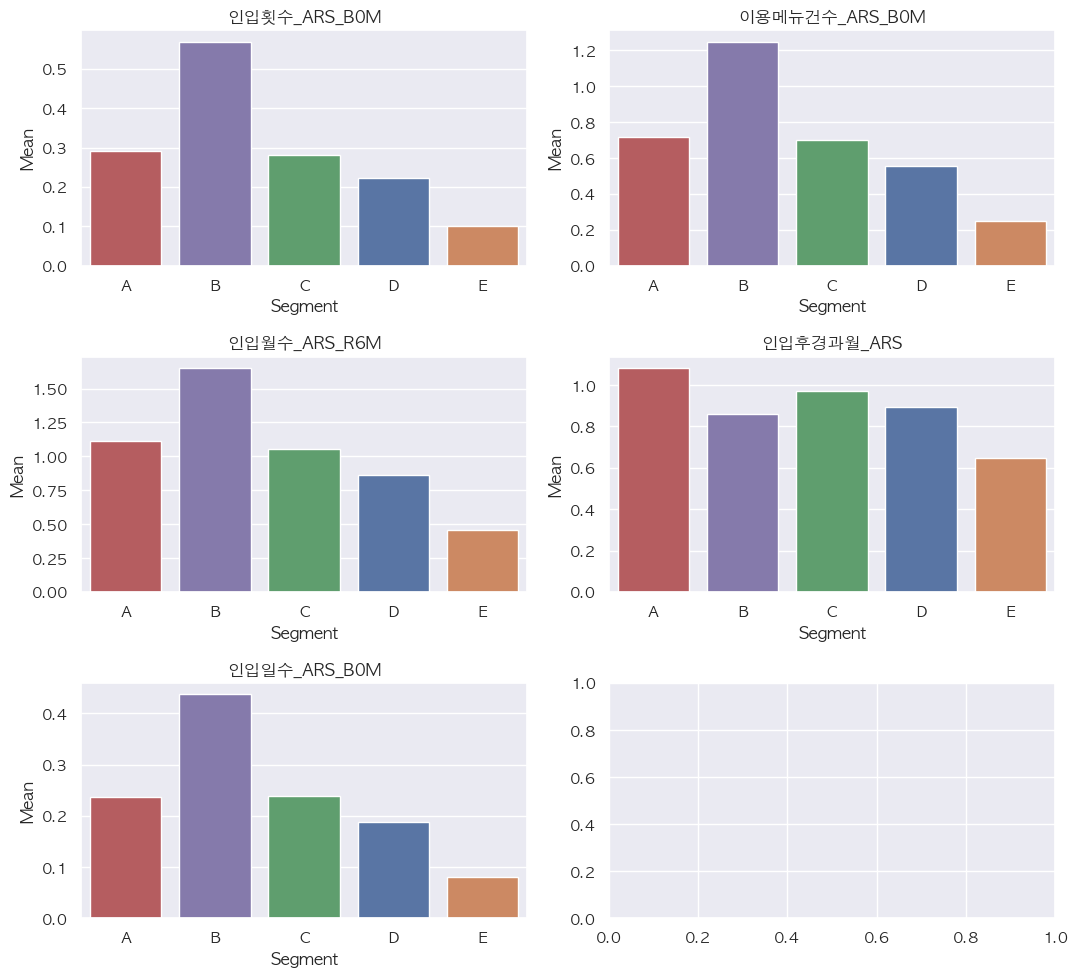

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Segment 전체 리스트(원하는 순서로 정렬)
segment_order = sorted(df['Segment'].unique())     # 혹은 ['A','B','C', …] 로 수동 지정

# 1) 그릴 컬럼
metrics = [
    '인입횟수_ARS_B0M',
    '이용메뉴건수_ARS_B0M',
    '인입월수_ARS_R6M',
    '인입후경과월_ARS',
    '인입일수_ARS_B0M'
]

# 2) Figure & Axes (sharex=False → 각 축 따로)
fig, axes = plt.subplots(3, 2, figsize=(11, 10), sharex=False)
axes = axes.flatten()

# 3) 반복해서 막대 그래프
for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df,
        x='Segment',
        y=metric,
        estimator='mean',
        ci=None,
        order=segment_order,   # ★ 모든 Segment 강제 고정 ★
        ax=ax,
        hue = 'Segment'
    )
    ax.set_title(metric)
    ax.set_xlabel('Segment')
    ax.set_ylabel('Mean')

# 4) 레이아웃 조정
plt.tight_layout()
plt.show()


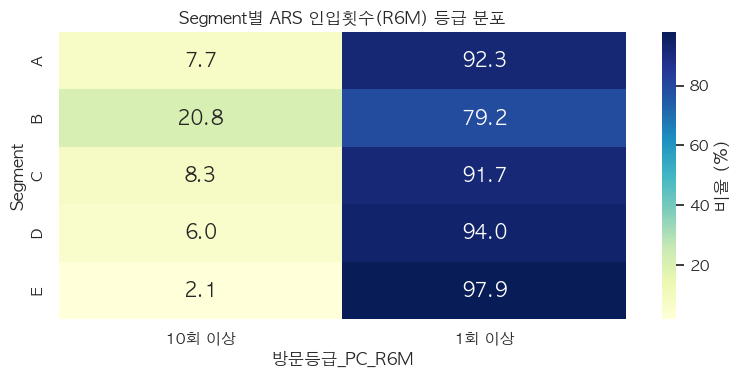

In [43]:
ct = pd.crosstab(
    df['Segment'],          # 행
    df['인입횟수_ARS_R6M'],   # 열 (또는 이미 범주형인 방문횟수_PC_R6M)
    normalize='index'       # 각 Segment 내부에서 비율(%)로
)

plt.figure(figsize=(8, 4))
sns.heatmap(
    ct * 100,               # 보기 편하도록 %
    annot=True,             # 숫자 표시
    fmt='.1f',
    cmap='YlGnBu',
    cbar_kws={'label': '비율 (%)'}
)
plt.title('Segment별 ARS 인입횟수(R6M) 등급 분포')
plt.ylabel('Segment')
plt.xlabel('방문등급_PC_R6M')
plt.tight_layout()
plt.show()

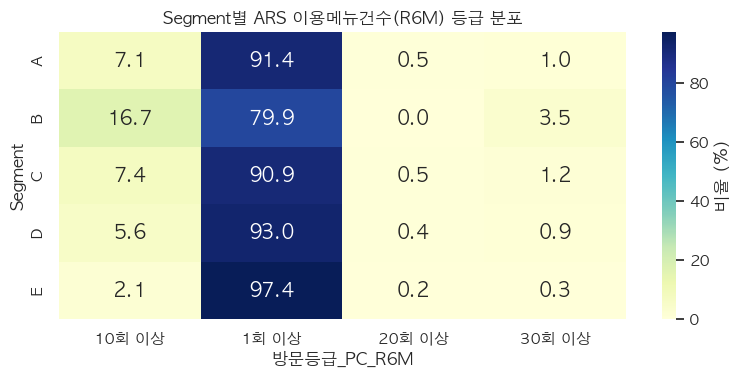

In [45]:
ct = pd.crosstab(
    df['Segment'],          # 행
    df['이용메뉴건수_ARS_R6M'],   # 열 (또는 이미 범주형인 방문횟수_PC_R6M)
    normalize='index'       # 각 Segment 내부에서 비율(%)로
)

plt.figure(figsize=(8, 4))
sns.heatmap(
    ct * 100,               # 보기 편하도록 %
    annot=True,             # 숫자 표시
    fmt='.1f',
    cmap='YlGnBu',
    cbar_kws={'label': '비율 (%)'}
)
plt.title('Segment별 ARS 이용메뉴건수(R6M) 등급 분포')
plt.ylabel('Segment')
plt.xlabel('방문등급_PC_R6M')
plt.tight_layout()
plt.show()

### PC 관련 정보 (인입횟수/인입일수)
- 상대적으로 B가 PC로 인입하는 비율이 높은걸 관찰함

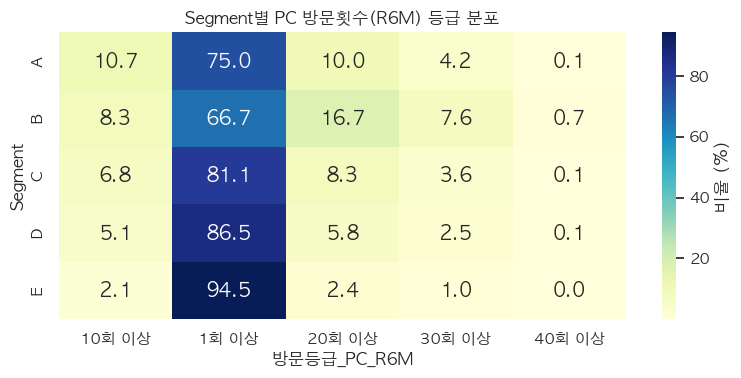

In [68]:
ct = pd.crosstab(
    df['Segment'],          # 행
    df['방문횟수_PC_R6M'],   # 열 (또는 이미 범주형인 방문횟수_PC_R6M)
    normalize='index'       # 각 Segment 내부에서 비율(%)로
)

plt.figure(figsize=(8, 4))
sns.heatmap(
    ct * 100,               # 보기 편하도록 %
    annot=True,             # 숫자 표시
    fmt='.1f',
    cmap='YlGnBu',
    cbar_kws={'label': '비율 (%)'}
)
plt.title('Segment별 PC 방문횟수(R6M) 등급 분포')
plt.ylabel('Segment')
plt.xlabel('방문등급_PC_R6M')
plt.tight_layout()
plt.show()

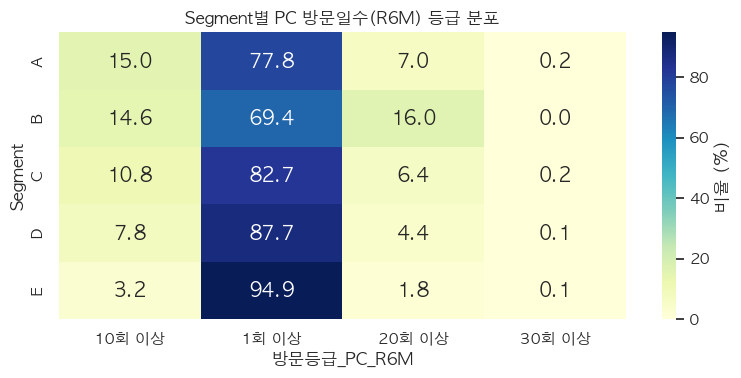

In [49]:
ct = pd.crosstab(
    df['Segment'],          # 행
    df['방문일수_PC_R6M'],   # 열 (또는 이미 범주형인 방문횟수_PC_R6M)
    normalize='index'       # 각 Segment 내부에서 비율(%)로
)

plt.figure(figsize=(8, 4))
sns.heatmap(
    ct * 100,               # 보기 편하도록 %
    annot=True,             # 숫자 표시
    fmt='.1f',
    cmap='YlGnBu',
    cbar_kws={'label': '비율 (%)'}
)
plt.title('Segment별 PC 방문일수(R6M) 등급 분포')
plt.ylabel('Segment')
plt.xlabel('방문등급_PC_R6M')
plt.tight_layout()
plt.show()

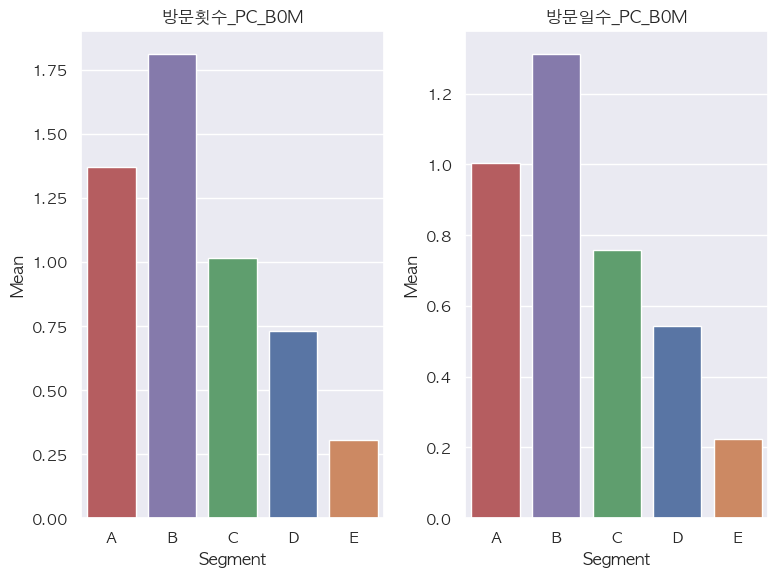

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Segment 전체 리스트(원하는 순서로 정렬)
segment_order = sorted(df['Segment'].unique())     # 혹은 ['A','B','C', …] 로 수동 지정

# 1) 그릴 컬럼
metrics = [
    '방문횟수_PC_B0M',
    '방문일수_PC_B0M',
]

# 2) Figure & Axes (sharex=False → 각 축 따로)
fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharex=False)
axes = axes.flatten()

# 3) 반복해서 막대 그래프
for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df,
        x='Segment',
        y=metric,
        estimator='mean',
        ci=None,
        order=segment_order,   # ★ 모든 Segment 강제 고정 ★
        ax=ax,
        hue = 'Segment'
    )
    ax.set_title(metric)
    ax.set_xlabel('Segment')
    ax.set_ylabel('Mean')

# 4) 레이아웃 조정
plt.tight_layout()
plt.show()


### 앱 관련 정보 (방문횟수 / 방문일수)
- B 등급이 앱 사용을 활발히 하는듯 함

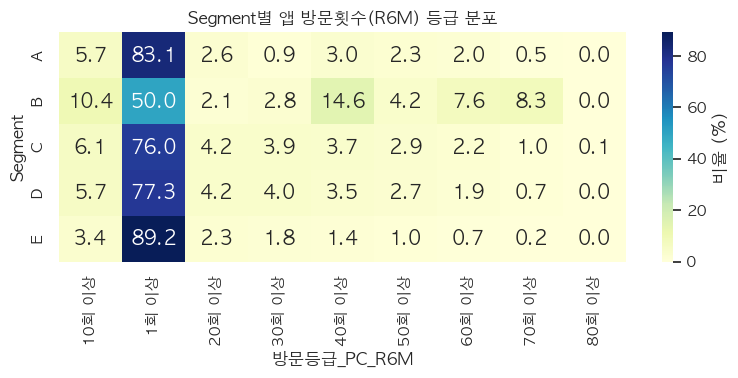

In [56]:
ct = pd.crosstab(
    df['Segment'],          # 행
    df['방문횟수_앱_R6M'],   # 열 (또는 이미 범주형인 방문횟수_PC_R6M)
    normalize='index'       # 각 Segment 내부에서 비율(%)로
)

plt.figure(figsize=(8, 4))
sns.heatmap(
    ct * 100,               # 보기 편하도록 %
    annot=True,             # 숫자 표시
    fmt='.1f',
    cmap='YlGnBu',
    cbar_kws={'label': '비율 (%)'}
)
plt.title('Segment별 앱 방문횟수(R6M) 등급 분포')
plt.ylabel('Segment')
plt.xlabel('방문등급_PC_R6M')
plt.tight_layout()
plt.show()

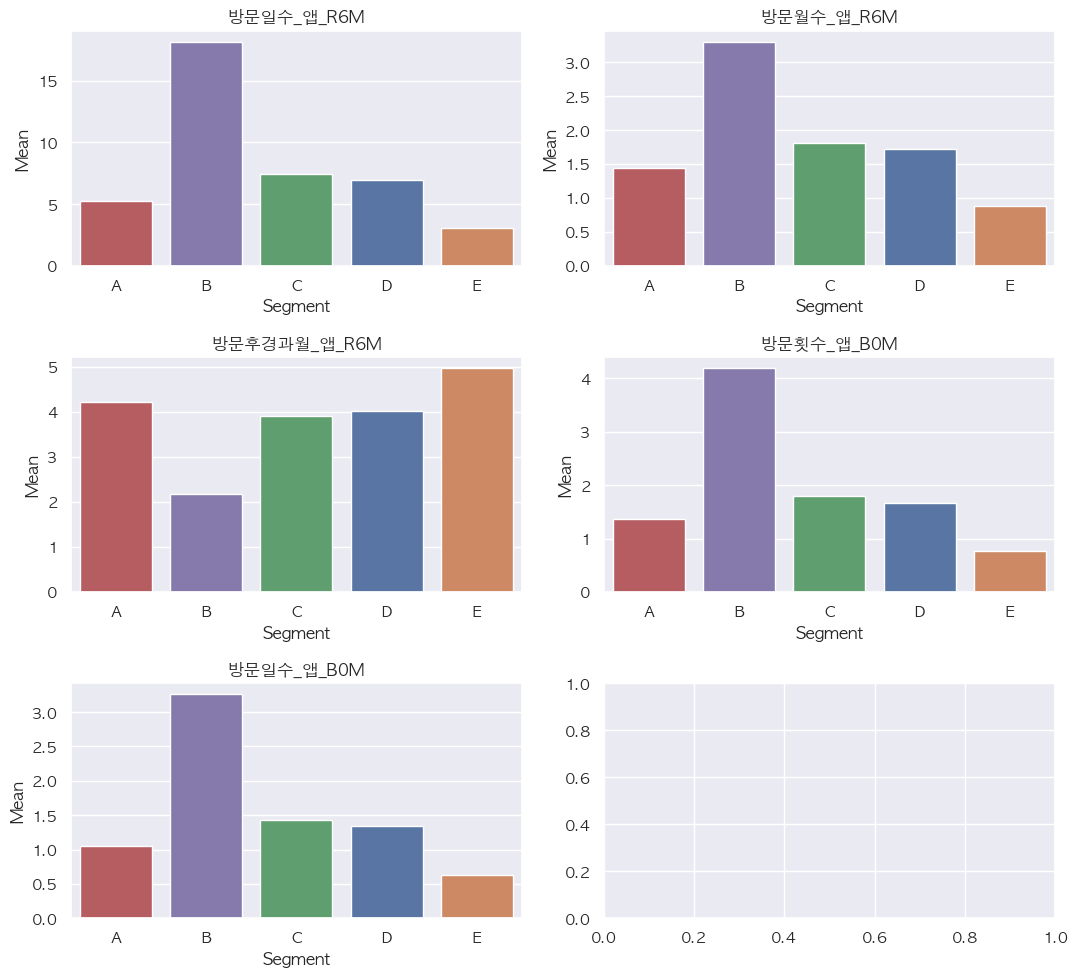

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Segment 전체 리스트(원하는 순서로 정렬)
segment_order = sorted(df['Segment'].unique())     # 혹은 ['A','B','C', …] 로 수동 지정

# 1) 그릴 컬럼
metrics = [
    '방문일수_앱_R6M',
    '방문월수_앱_R6M',
    '방문후경과월_앱_R6M',
    '방문횟수_앱_B0M',
    '방문일수_앱_B0M',
]

# 2) Figure & Axes (sharex=False → 각 축 따로)
fig, axes = plt.subplots(3, 2, figsize=(11, 10), sharex=False)
axes = axes.flatten()

# 3) 반복해서 막대 그래프
for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df,
        x='Segment',
        y=metric,
        estimator='mean',
        ci=None,
        order=segment_order,   # ★ 모든 Segment 강제 고정 ★
        ax=ax,
        hue = 'Segment'
    )
    ax.set_title(metric)
    ax.set_xlabel('Segment')
    ax.set_ylabel('Mean')

# 4) 레이아웃 조정
plt.tight_layout()
plt.show()


### 모바일 웹 관련 정보
- 지난 6개월 동안 모바일 웹 이용은 A와 C가 높은 편이다.
- B가 모바일 웹에서는 약함
- 당월 데이터에는 A, B는 없고 나머지 등급도 평균치가 엄청 낮은걸 보면 당월은 활동이 거의 없는듯함

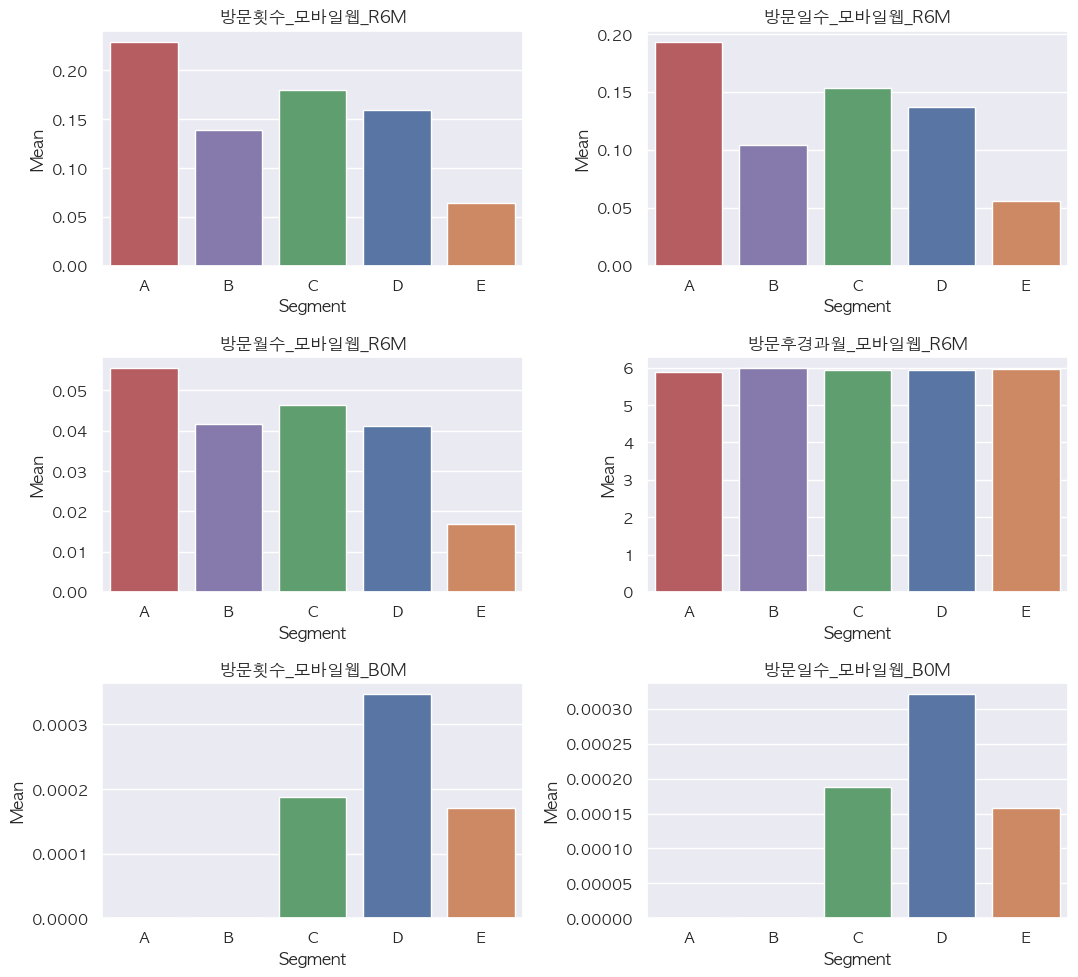

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Segment 전체 리스트(원하는 순서로 정렬)
segment_order = sorted(df['Segment'].unique())     # 혹은 ['A','B','C', …] 로 수동 지정

# 1) 그릴 컬럼
metrics = [
    '방문횟수_모바일웹_R6M',
    '방문일수_모바일웹_R6M',
    '방문월수_모바일웹_R6M',
    '방문후경과월_모바일웹_R6M',
    '방문횟수_모바일웹_B0M',
    '방문일수_모바일웹_B0M'
]

# 2) Figure & Axes (sharex=False → 각 축 따로)
fig, axes = plt.subplots(3, 2, figsize=(11, 10), sharex=False)
axes = axes.flatten()

# 3) 반복해서 막대 그래프
for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df,
        x='Segment',
        y=metric,
        estimator='mean',
        ci=None,
        order=segment_order,   # ★ 모든 Segment 강제 고정 ★
        ax=ax,
        hue = 'Segment'
    )
    ax.set_title(metric)
    ax.set_xlabel('Segment')
    ax.set_ylabel('Mean')

# 4) 레이아웃 조정
plt.tight_layout()
plt.show()


### IB(인터넷뱅킹) 관련 정보
####  IB관련 칼럼이 많기 때문에 관련도 별로 묶어서 진행

- B가 가장 활발하게 인입한 것으로 보임

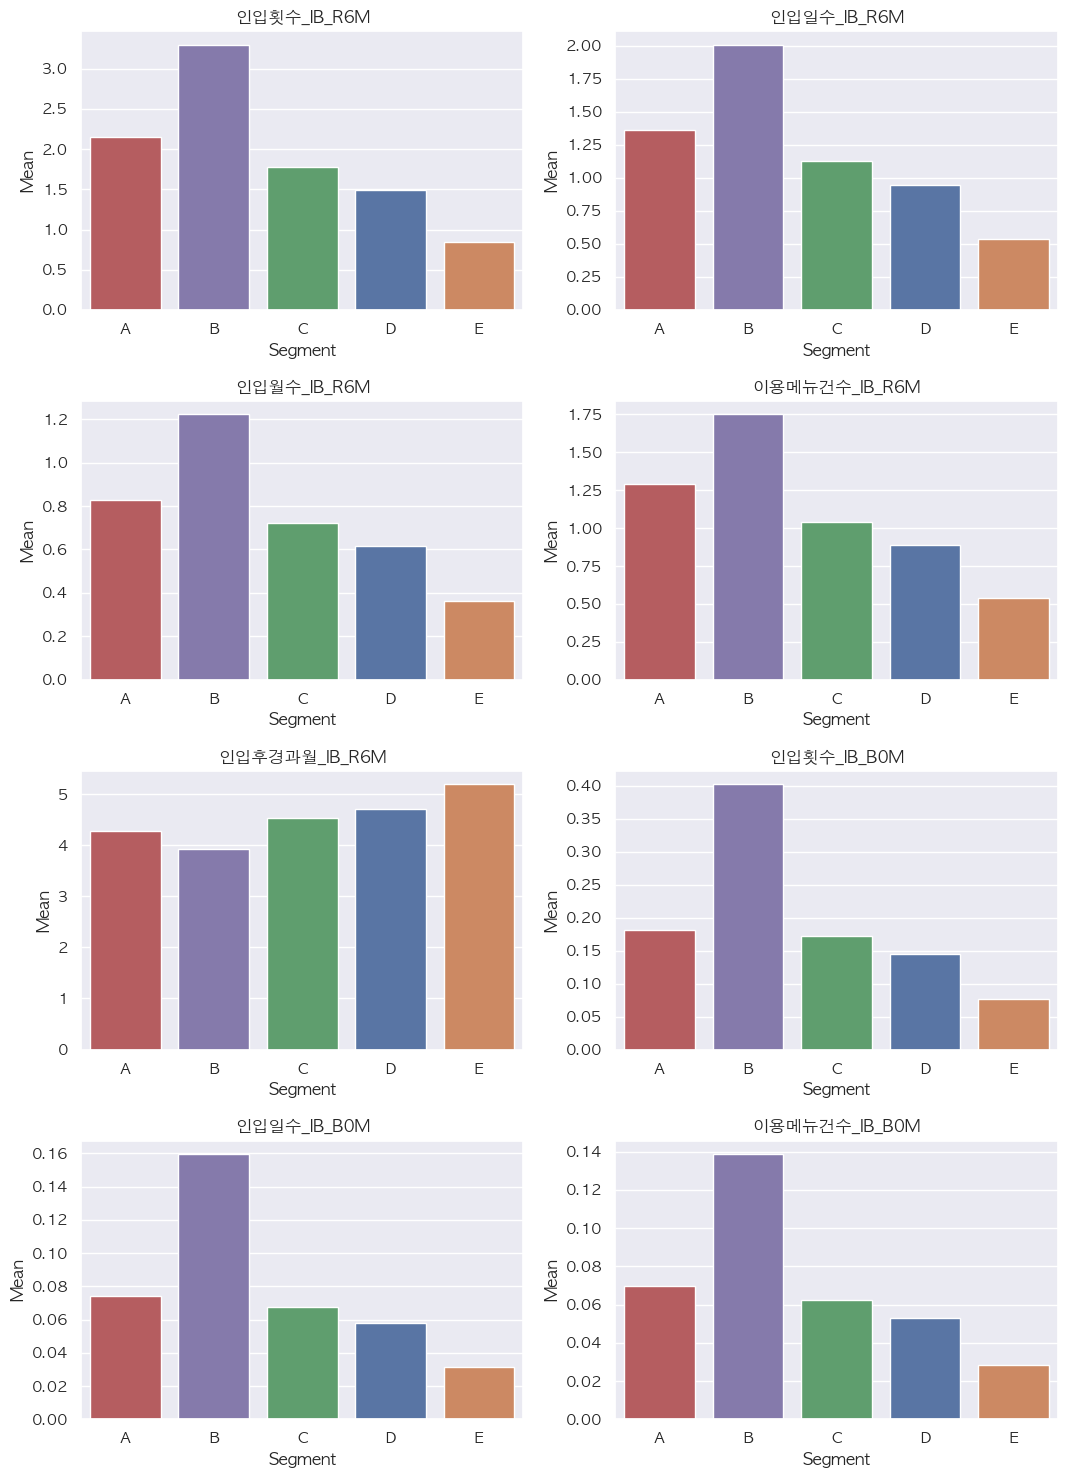

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Segment 전체 리스트(원하는 순서로 정렬)
segment_order = sorted(df['Segment'].unique())     # 혹은 ['A','B','C', …] 로 수동 지정

# 1) 그릴 컬럼
metrics = [
    '인입횟수_IB_R6M',
    '인입일수_IB_R6M',
    '인입월수_IB_R6M',
    '이용메뉴건수_IB_R6M',
    '인입후경과월_IB_R6M',
    '인입횟수_IB_B0M',
    '인입일수_IB_B0M',
    '이용메뉴건수_IB_B0M',
]

# 2) Figure & Axes (sharex=False → 각 축 따로)
fig, axes = plt.subplots(4, 2, figsize=(11, 15), sharex=False)
axes = axes.flatten()

# 3) 반복해서 막대 그래프
for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df,
        x='Segment',
        y=metric,
        estimator='mean',
        ci=None,
        order=segment_order,   # ★ 모든 Segment 강제 고정 ★
        ax=ax,
        hue = 'Segment'
    )
    ax.set_title(metric)
    ax.set_xlabel('Segment')
    ax.set_ylabel('Mean')

# 4) 레이아웃 조정
plt.tight_layout()
plt.show()


### IB 불만 정보
- 불만에 대한 데이터가 모두 0이다

- 즉, 불만을 제기한 경우가 거의 없다고 봐도 무방 ?

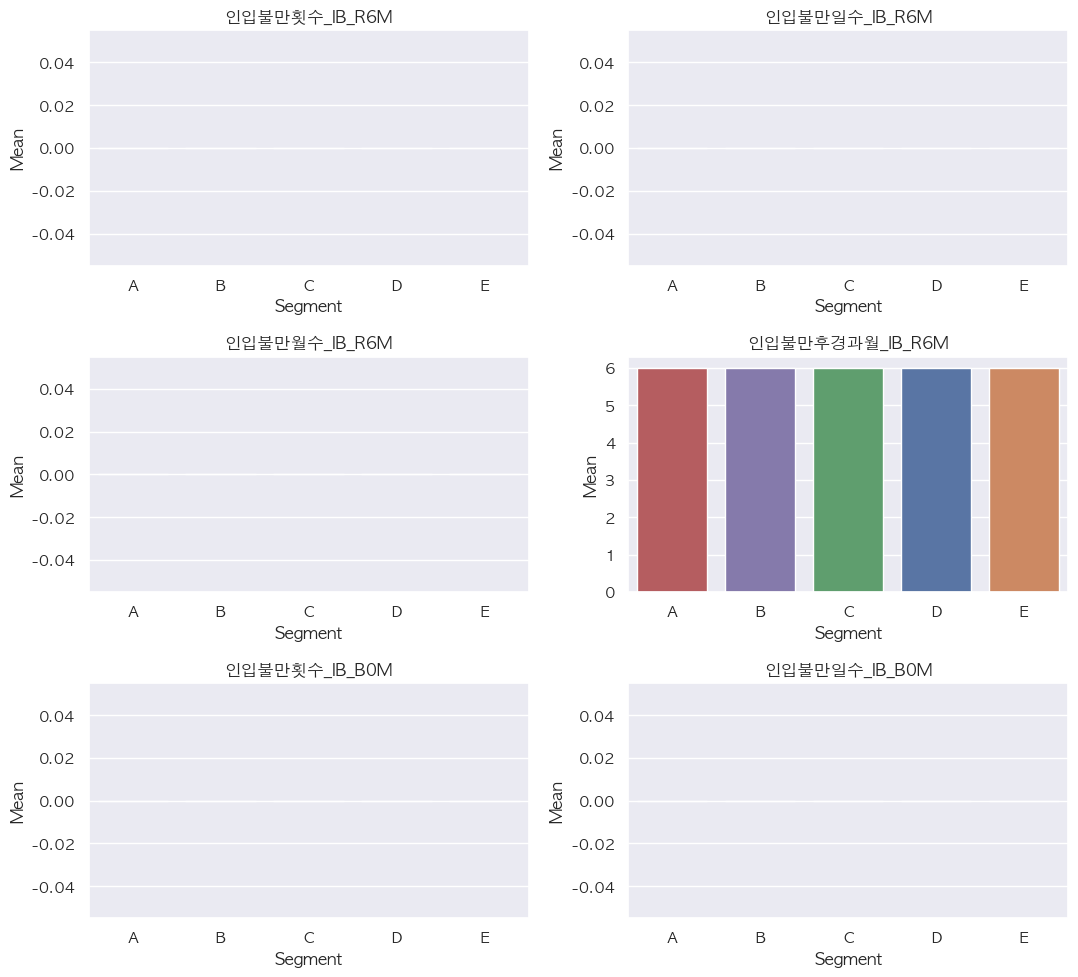

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Segment 전체 리스트(원하는 순서로 정렬)
segment_order = sorted(df['Segment'].unique())     # 혹은 ['A','B','C', …] 로 수동 지정

# 1) 그릴 컬럼
metrics = [
    '인입불만횟수_IB_R6M',
    '인입불만일수_IB_R6M',
    '인입불만월수_IB_R6M',
    '인입불만후경과월_IB_R6M',
    '인입불만횟수_IB_B0M',
    '인입불만일수_IB_B0M',
]

# 2) Figure & Axes (sharex=False → 각 축 따로)
fig, axes = plt.subplots(3, 2, figsize=(11, 10), sharex=False)
axes = axes.flatten()

# 3) 반복해서 막대 그래프
for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df,
        x='Segment',
        y=metric,
        estimator='mean',
        ci=None,
        order=segment_order,   # ★ 모든 Segment 강제 고정 ★
        ax=ax,
        hue = 'Segment'
    )
    ax.set_title(metric)
    ax.set_xlabel('Segment')
    ax.set_ylabel('Mean')

# 4) 레이아웃 조정
plt.tight_layout()
plt.show()


### 당월 상담 건수
- B가 가장 많고, A,C는 비슷

<Axes: xlabel='Segment', ylabel='상담건수_B0M'>

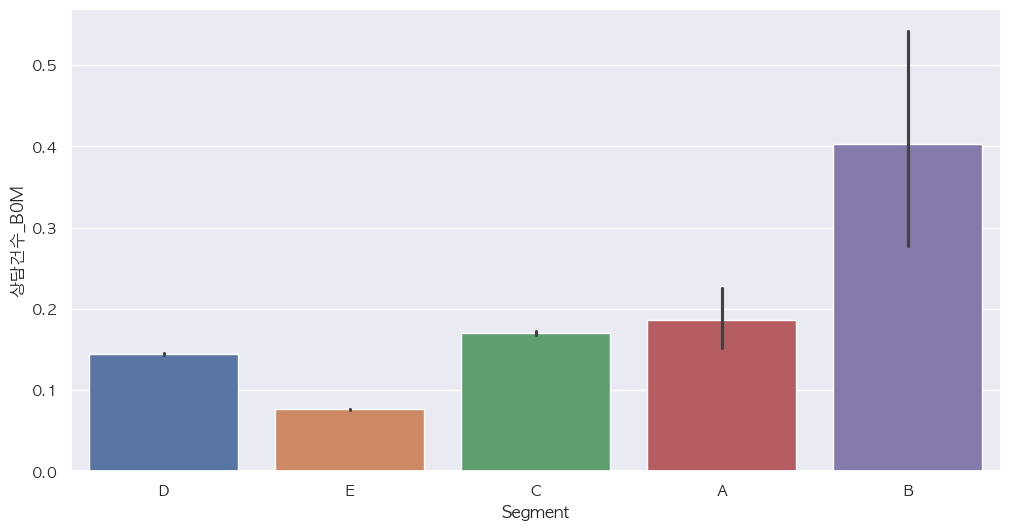

In [136]:
sns.barplot(data = df, x = 'Segment', y = '상담건수_B0M', hue = 'Segment', estimator = 'mean')

### 당월 IB 문의유형
- 대부분 0 값임

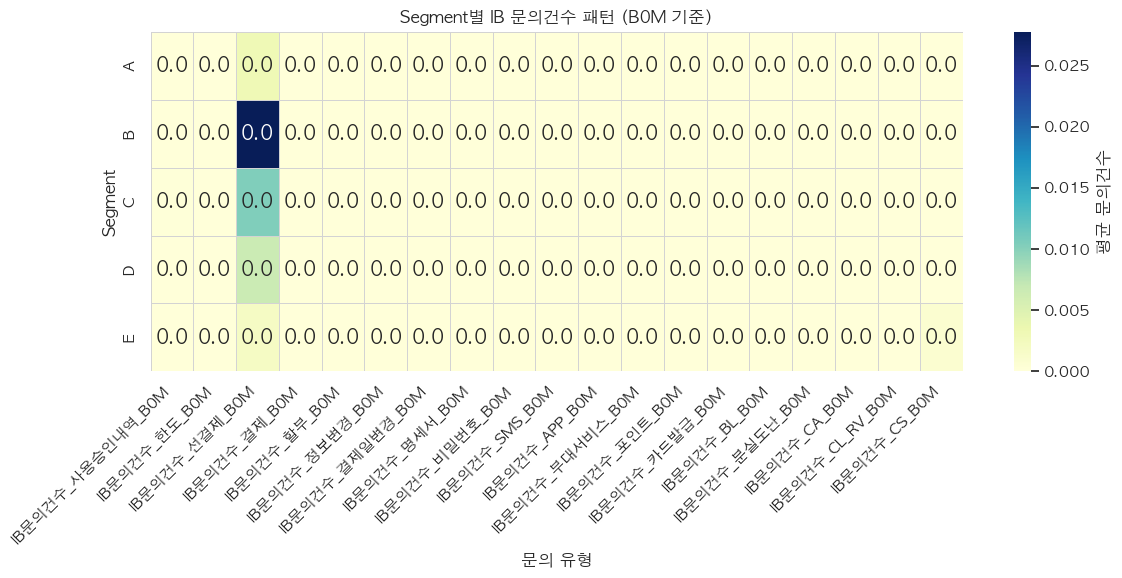

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ────────────────────────────────────────────────────────
# 0) 분석 대상 컬럼
ib_cols = [
    'IB문의건수_사용승인내역_B0M','IB문의건수_한도_B0M','IB문의건수_선결제_B0M',
    'IB문의건수_결제_B0M','IB문의건수_할부_B0M','IB문의건수_정보변경_B0M',
    'IB문의건수_결제일변경_B0M','IB문의건수_명세서_B0M','IB문의건수_비밀번호_B0M',
    'IB문의건수_SMS_B0M','IB문의건수_APP_B0M','IB문의건수_부대서비스_B0M',
    'IB문의건수_포인트_B0M','IB문의건수_카드발급_B0M','IB문의건수_BL_B0M',
    'IB문의건수_분실도난_B0M','IB문의건수_CA_B0M','IB문의건수_CL_RV_B0M',
    'IB문의건수_CS_B0M'
]

# 1) Segment별 평균(또는 합계) 집계
seg_order = sorted(df['Segment'].unique())           # 원하는 순서로 수정 가능
mean_tbl  = (df.groupby('Segment')[ib_cols]
               .mean()
               .loc[seg_order])                      # 행 순서 고정

# ─ 참고 ─
# ▶ 합계를 보고 싶다면 .sum() 으로만 바꾸면 됩니다.
# ▶ scale 차이가 너무 크면 아래 두 줄로 Z-score 표준화해서 패턴만 비교 가능
#   from scipy.stats import zscore
#   mean_tbl = mean_tbl.apply(zscore, axis=0)

# 2) 히트맵
plt.figure(figsize=(12, 6))
sns.heatmap(
    mean_tbl,
    cmap='YlGnBu',
    annot=True, fmt='.1f',        # 한눈에 값 확인
    linewidths=.5, linecolor='lightgray',
    cbar_kws={'label': '평균 문의건수'}
)
plt.title('Segment별 IB 문의건수 패턴 (B0M 기준)')
plt.ylabel('Segment')
plt.xlabel('문의 유형')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 최근 6개월 상담건수
- B가 가장 많다 --> B가 무슨 상담을 많이 하는지 알아볼 필요가 있음

<Axes: xlabel='Segment', ylabel='상담건수_R6M'>

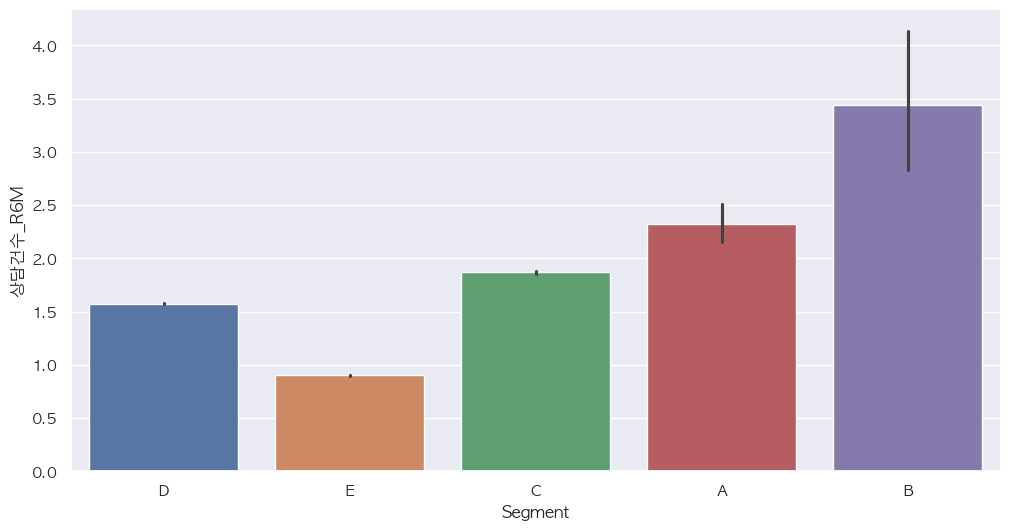

In [137]:
sns.barplot(data = df, x = 'Segment', y = '상담건수_R6M', hue = 'Segment', estimator = 'mean')

### 최근 6개월 IB 문의유형
- 사용승인내역, 선결제 문의를 다수 한 것으로 보임

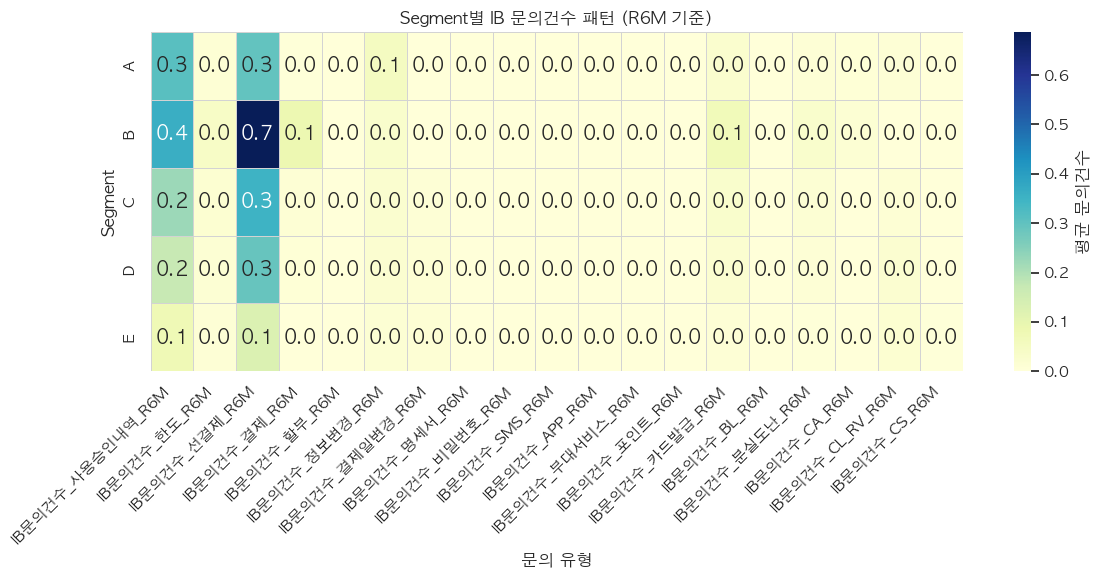

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ────────────────────────────────────────────────────────
# 0) 분석 대상 컬럼
ib_cols = [
    'IB문의건수_사용승인내역_R6M',
     'IB문의건수_한도_R6M',
     'IB문의건수_선결제_R6M',
     'IB문의건수_결제_R6M',
     'IB문의건수_할부_R6M',
     'IB문의건수_정보변경_R6M',
     'IB문의건수_결제일변경_R6M',
     'IB문의건수_명세서_R6M',
     'IB문의건수_비밀번호_R6M',
     'IB문의건수_SMS_R6M',
     'IB문의건수_APP_R6M',
     'IB문의건수_부대서비스_R6M',
     'IB문의건수_포인트_R6M',
     'IB문의건수_카드발급_R6M',
     'IB문의건수_BL_R6M',
     'IB문의건수_분실도난_R6M',
     'IB문의건수_CA_R6M',
     'IB문의건수_CL_RV_R6M',
     'IB문의건수_CS_R6M',
]

# 1) Segment별 평균(또는 합계) 집계
seg_order = sorted(df['Segment'].unique())           # 원하는 순서로 수정 가능
mean_tbl  = (df.groupby('Segment')[ib_cols]
               .mean()
               .loc[seg_order])                      # 행 순서 고정

# ─ 참고 ─
# ▶ 합계를 보고 싶다면 .sum() 으로만 바꾸면 됩니다.
# ▶ scale 차이가 너무 크면 아래 두 줄로 Z-score 표준화해서 패턴만 비교 가능
#   from scipy.stats import zscore
#   mean_tbl = mean_tbl.apply(zscore, axis=0)

# 2) 히트맵
plt.figure(figsize=(12, 6))
sns.heatmap(
    mean_tbl,
    cmap='YlGnBu',
    annot=True, fmt='.1f',        # 한눈에 값 확인
    linewidths=.5, linecolor='lightgray',
    cbar_kws={'label': '평균 문의건수'}
)
plt.title('Segment별 IB 문의건수 패턴 (R6M 기준)')
plt.ylabel('Segment')
plt.xlabel('문의 유형')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 최근 6개월 IB 상담유형
- 모두 0값이다
- 위에서 본 최근 6개월 IB 상담건수는 아래 유형에 모두 포함되지 않는 상담내용이라 추정

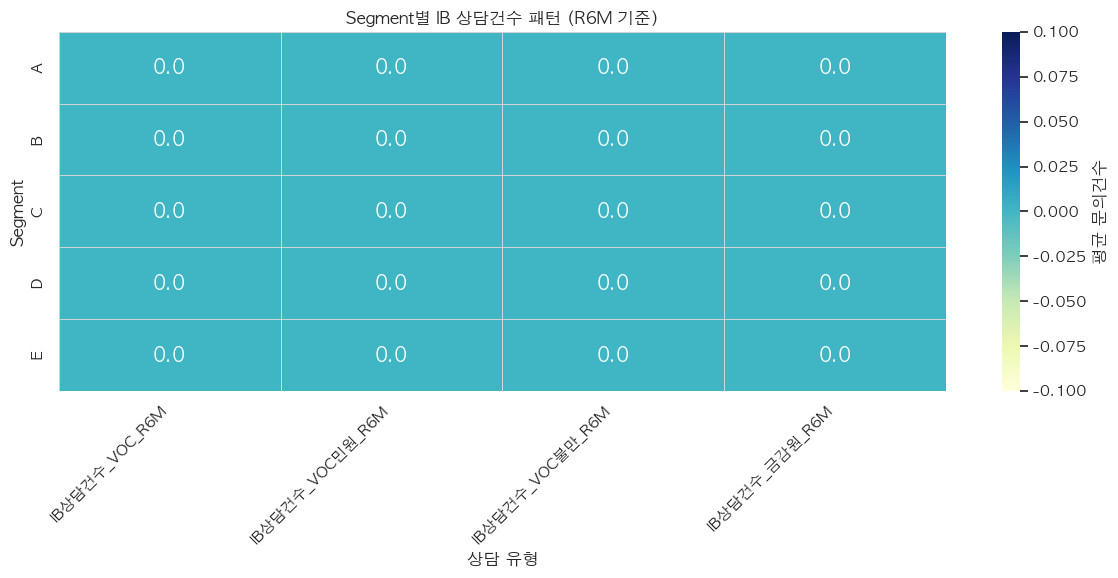

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ────────────────────────────────────────────────────────
# 0) 분석 대상 컬럼
ib_cols = [
    'IB상담건수_VOC_R6M',
     'IB상담건수_VOC민원_R6M',
     'IB상담건수_VOC불만_R6M',
     'IB상담건수_금감원_R6M',

]

# 1) Segment별 평균(또는 합계) 집계
seg_order = sorted(df['Segment'].unique())           # 원하는 순서로 수정 가능
mean_tbl  = (df.groupby('Segment')[ib_cols]
               .mean()
               .loc[seg_order])                      # 행 순서 고정

# ─ 참고 ─
# ▶ 합계를 보고 싶다면 .sum() 으로만 바꾸면 됩니다.
# ▶ scale 차이가 너무 크면 아래 두 줄로 Z-score 표준화해서 패턴만 비교 가능
#   from scipy.stats import zscore
#   mean_tbl = mean_tbl.apply(zscore, axis=0)

# 2) 히트맵
plt.figure(figsize=(12, 6))
sns.heatmap(
    mean_tbl,
    cmap='YlGnBu',
    annot=True, fmt='.1f',        # 한눈에 값 확인
    linewidths=.5, linecolor='lightgray',
    cbar_kws={'label': '평균 문의건수'}
)
plt.title('Segment별 IB 상담건수 패턴 (R6M 기준)')
plt.ylabel('Segment')
plt.xlabel('상담 유형')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 불만제기건수
- 0건

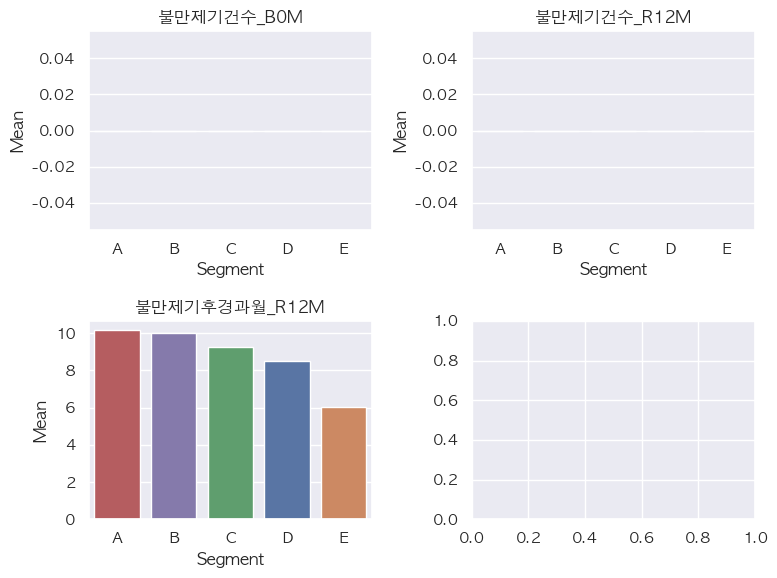

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Segment 전체 리스트(원하는 순서로 정렬)
segment_order = sorted(df['Segment'].unique())     # 혹은 ['A','B','C', …] 로 수동 지정

# 1) 그릴 컬럼
metrics = [
    '불만제기건수_B0M',
     '불만제기건수_R12M',
     '불만제기후경과월_R12M',
]

# 2) Figure & Axes (sharex=False → 각 축 따로)
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=False)
axes = axes.flatten()

# 3) 반복해서 막대 그래프
for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df,
        x='Segment',
        y=metric,
        estimator='mean',
        ci=None,
        order=segment_order,   # ★ 모든 Segment 강제 고정 ★
        ax=ax,
        hue = 'Segment'
    )
    ax.set_title(metric)
    ax.set_xlabel('Segment')
    ax.set_ylabel('Mean')

# 4) 레이아웃 조정
plt.tight_layout()
plt.show()


### 당사 Pay 관련 정보
- 0건

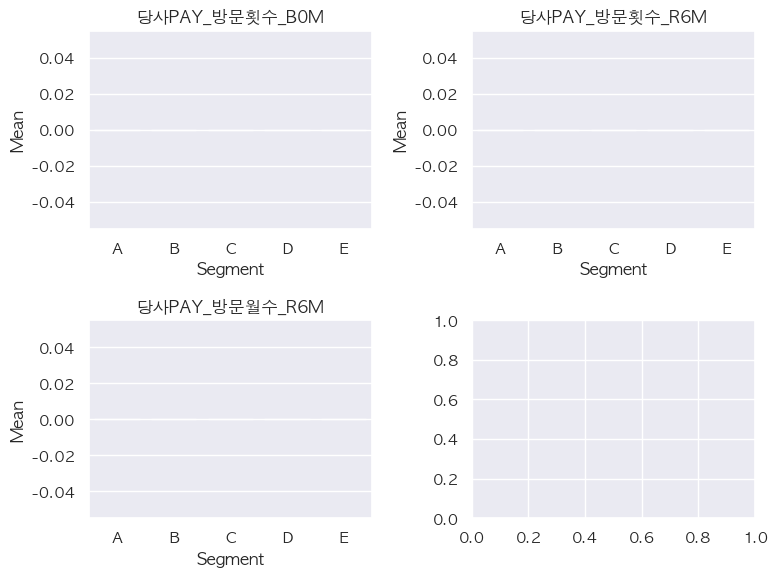

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Segment 전체 리스트(원하는 순서로 정렬)
segment_order = sorted(df['Segment'].unique())     # 혹은 ['A','B','C', …] 로 수동 지정

# 1) 그릴 컬럼
metrics = [
    '당사PAY_방문횟수_B0M',
     '당사PAY_방문횟수_R6M',
     '당사PAY_방문월수_R6M',
]

# 2) Figure & Axes (sharex=False → 각 축 따로)
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=False)
axes = axes.flatten()

# 3) 반복해서 막대 그래프
for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df,
        x='Segment',
        y=metric,
        estimator='mean',
        ci=None,
        order=segment_order,   # ★ 모든 Segment 강제 고정 ★
        ax=ax,
        hue = 'Segment'
    )
    ax.set_title(metric)
    ax.set_xlabel('Segment')
    ax.set_ylabel('Mean')

# 4) 레이아웃 조정
plt.tight_layout()
plt.show()


### 당사 멤버쉽 관련 정보
- C등급이 가장 많다
- C가 처음으로 상위권에 위치함

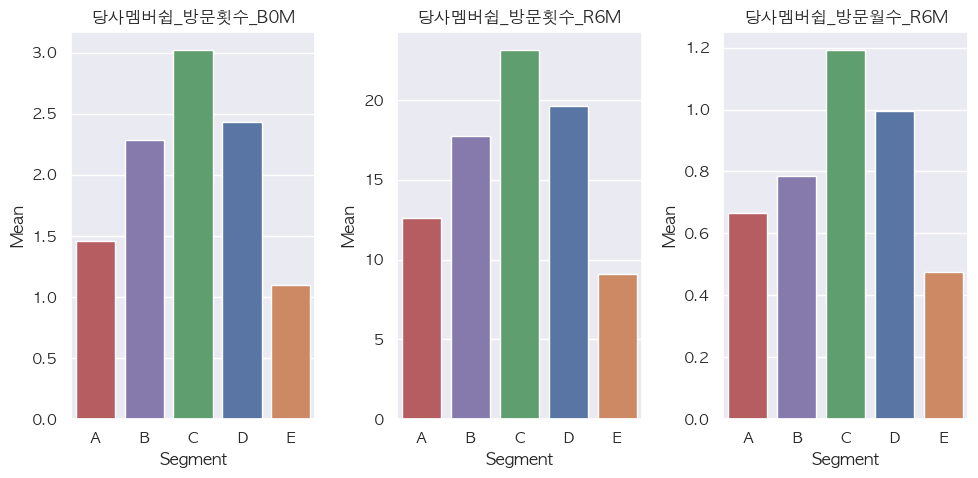

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Segment 전체 리스트(원하는 순서로 정렬)
segment_order = sorted(df['Segment'].unique())     # 혹은 ['A','B','C', …] 로 수동 지정

# 1) 그릴 컬럼
metrics = [
    '당사멤버쉽_방문횟수_B0M',
     '당사멤버쉽_방문횟수_R6M',
     '당사멤버쉽_방문월수_R6M',
]

# 2) Figure & Axes (sharex=False → 각 축 따로)
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharex=False)
axes = axes.flatten()

# 3) 반복해서 막대 그래프
for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df,
        x='Segment',
        y=metric,
        estimator='mean',
        ci=None,
        order=segment_order,   # ★ 모든 Segment 강제 고정 ★
        ax=ax,
        hue = 'Segment'
    )
    ax.set_title(metric)
    ax.set_xlabel('Segment')
    ax.set_ylabel('Mean')

# 4) 레이아웃 조정
plt.tight_layout()
plt.show()


### 홈페이지 관련 정보
- 각 segment별로 수치적 차이는 크지 않지만
- B가 가장 많음

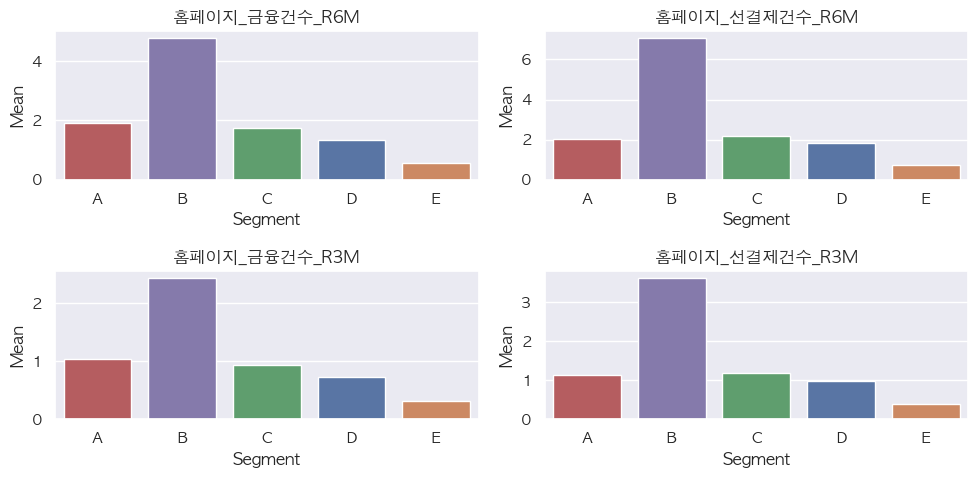

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Segment 전체 리스트(원하는 순서로 정렬)
segment_order = sorted(df['Segment'].unique())     # 혹은 ['A','B','C', …] 로 수동 지정

# 1) 그릴 컬럼
metrics = [
    '홈페이지_금융건수_R6M',
     '홈페이지_선결제건수_R6M',
     '홈페이지_금융건수_R3M',
     '홈페이지_선결제건수_R3M',
]

# 2) Figure & Axes (sharex=False → 각 축 따로)
fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=False)
axes = axes.flatten()

# 3) 반복해서 막대 그래프
for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df,
        x='Segment',
        y=metric,
        estimator='mean',
        ci=None,
        order=segment_order,   # ★ 모든 Segment 강제 고정 ★
        ax=ax,
        hue = 'Segment'
    )
    ax.set_title(metric)
    ax.set_xlabel('Segment')
    ax.set_ylabel('Mean')

# 4) 레이아웃 조정
plt.tight_layout()
plt.show()


### 피처를 선택할 경우

| 구분                      | 최종 채택 Feature                                                           | 선정 근거 / 활용 아이디어                                             |
| ----------------------- | ----------------------------------------------------------------------- | ----------------------------------------------------------- |
| **ARS(고객센터 ARS)**       | - 인입횟수·이용메뉴건수·인입월수 \_R6M<br>- 인입횟수·이용메뉴건수·인입일수 \_B0M<br>- 인입후경과월\_ARS   | B 세그먼트가 가장 활발하고 A·C·D·E가 뚜렷한 감소세 → Segment 식별력 기대           |
| **PC 채널**               | - 방문횟수·방문일수 \_R6M, \_B0M                                                | PC는 B만 두드러지게 높음 → 저변동·고정보 지표로 Good                          |
| **앱(App) 채널**           | - 방문횟수·방문일수·방문월수 \_R6M<br>- 방문횟수·방문일수 \_B0M<br>- 방문후경과월\_앱\_R6M         | 모바일 중심 이용도를 구분하는 핵심 축. 역시 B가 독주                             |
| **모바일 웹**               | - 방문횟수·방문일수 \_R6M<br>- 방문월수\_R6M                                        | R6M에서 A·C가 상대적으로 높고 B가 낮아 “역변별” 역할. **B0M 지표는 거의 0**이므로 제외  |
| **IB(인터넷뱅킹) Aggregate** | - 인입횟수·인입일수·인입월수·이용메뉴건수 \_R6M<br>- 인입횟수·인입일수 \_B0M<br>- 인입후경과월\_IB\_R6M | 전 채널 중 가장 Segment 간 편차 큼(B≻A≃C≻D≻E)                         |
| **IB 문의 유형 (R6M)**      | 사용승인내역·선결제·한도·결제·할부·정보변경·결제일변경·명세서·비밀번호                                 | R6M에서 유의미 빈도 존재. 나머지 유형은 0값이 대다수라 제외                        |
| **상담 건수**               | 상담건수\_B0M, 상담건수\_R6M                                                    | B가 확실히 많아 차별화 지표                                            |
| **당사 멤버십**              | 방문횟수\_B0M, 방문횟수\_R6M, 방문월수\_R6M                                         | C 세그먼트만 높은 ‘키 차별화’ 피처                                       |
| **홈페이지 거래**             | 금융건수\_R6M, 선결제건수\_R6M, 금융건수\_R3M, 선결제건수\_R3M                            | 절대값 작지만 B 중심 편차 존재 → 보조 판단용                                 |
| **Recency 계열**          | 각 채널별 `후경과월` 변수                                                         | “얼마나 최근까지 이용했나”는 **활성도**를 직접 표현                             |
